In [2]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set style
sns.set_theme(style="whitegrid")

In [4]:
# Task 1️⃣: Load and Explore the Dataset

In [5]:
try:
    # Load CSV dataset (make sure you downloaded iris.csv beforehand)
    df = pd.read_csv("iris.csv")
    print("✅ Dataset loaded successfully!\n")
except FileNotFoundError:
    print("⚠️ File not found. Please make sure 'iris.csv' is in your folder.")
    raise

✅ Dataset loaded successfully!



In [6]:
# Explore the structure of the dataset by checking the data types
# and looking for any missing values
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
# Display the sum of missing values in each column
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [8]:
# Clean the dataset by either filling or dropping any missing values.
# Here, we will drop rows with missing values for simplicity.
df_cleaned = df.dropna()
print(f"\n✅ Cleaned dataset. Rows before: {len(df)}, Rows after: {len(df_cleaned)}")


✅ Cleaned dataset. Rows before: 150, Rows after: 150


In [9]:
# 2️⃣ Basic Data Analysis

In [10]:
# Summarize the dataset to get insights into the distribution of each feature
print("\nStatistical Summary of the Dataset:")
print(df.describe())


Statistical Summary of the Dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [17]:
# Calculate the mean, median, and standard deviation for each feature
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
std_values = df.std(numeric_only=True)
print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nStandard Deviation Values:\n", std_values)


Mean Values:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

Median Values:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

Standard Deviation Values:
 sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


In [12]:
# Dataset Dimensions
rows, cols = df.shape
print(f"\nThe dataset contains {rows} rows and {cols} columns.")


The dataset contains 150 rows and 5 columns.


In [13]:
# Count of each species
species_counts = df["species"].value_counts()
print("\nSpecies Counts:")
print(species_counts)


Species Counts:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [14]:
# 🌸 Average feature values for each species
avg_features = df.groupby("species").mean(numeric_only=True)
print("\nAverage Sepal & Petal Measurements by Species:")
print(avg_features)


Average Sepal & Petal Measurements by Species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [15]:
# Correlation between features
print("\nCorrelation matrix:")
print(df.corr(numeric_only=True))


Correlation matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [16]:
# Feature Ranges
print("\nFeature ranges:")
print(df.describe().loc[["min", "max"]])


Feature ranges:
     sepal_length  sepal_width  petal_length  petal_width
min           4.3          2.0           1.0          0.1
max           7.9          4.4           6.9          2.5


In [18]:
# 3️⃣ Visualizations

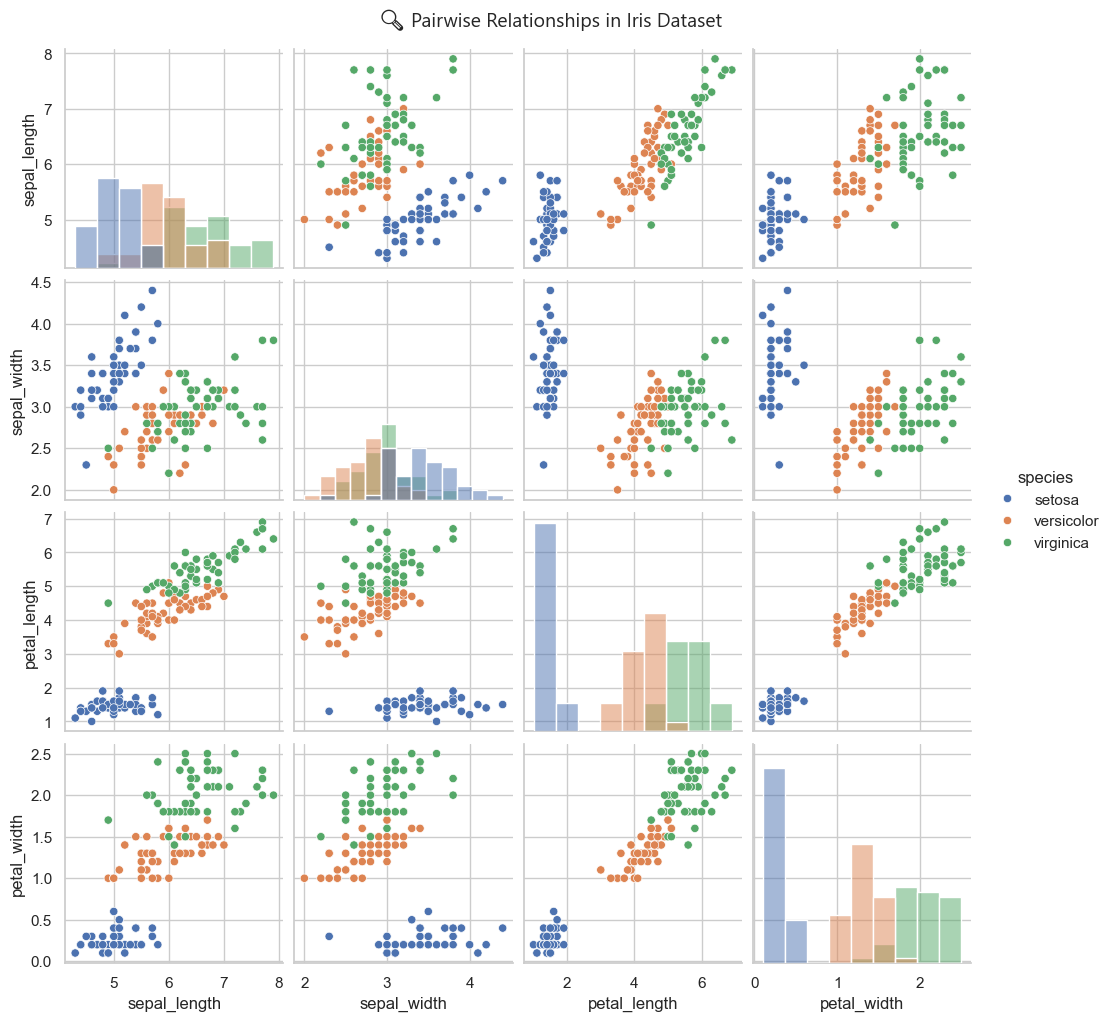

In [24]:
# 3a. Pairplot (scatterplot matrix of all features by species)
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("🔍 Pairwise Relationships in Iris Dataset", y=1.02, fontsize=14, fontname = "Segoe UI Emoji")
plt.show()

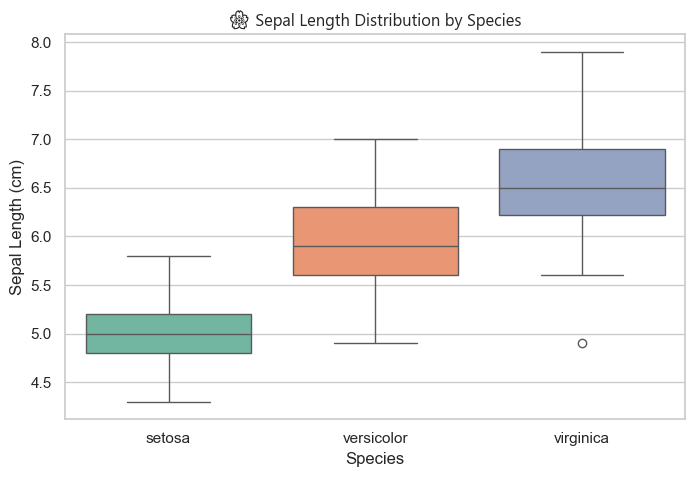

In [25]:
# 3b. Boxplot of sepal length by species
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="species", hue="species",y="sepal_length", palette="Set2")
plt.title("🌸 Sepal Length Distribution by Species", fontname = "Segoe UI Emoji")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

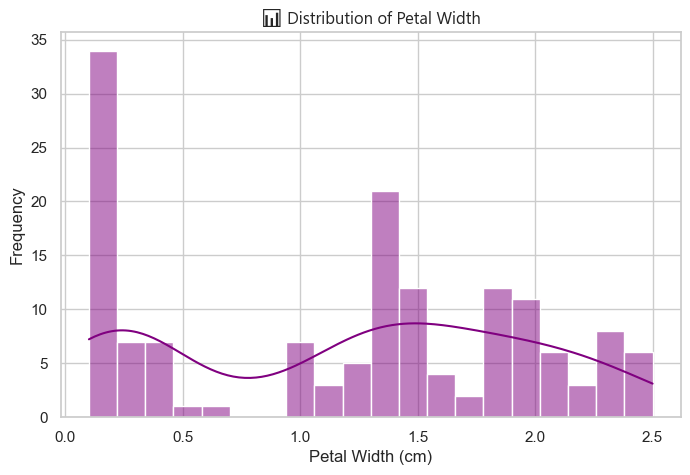

In [27]:
# 3c. Histogram of petal width
plt.figure(figsize=(8,5))
sns.histplot(df["petal_width"], kde=True, color="purple", bins=20)
plt.title("📊 Distribution of Petal Width", fontname = "Segoe UI Emoji")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.show()

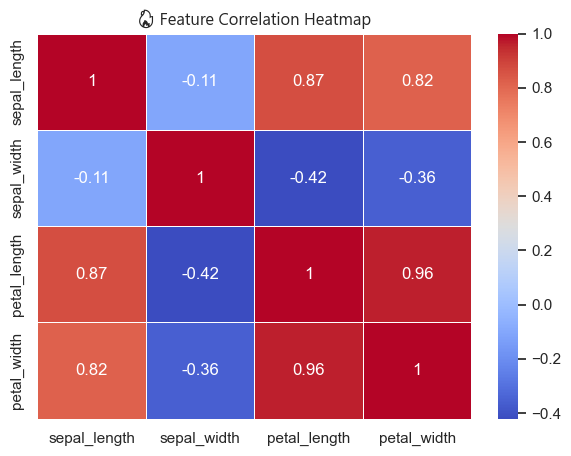

In [28]:
# 3d. Correlation heatmap
plt.figure(figsize=(7,5))
corr = df.drop(columns=["species"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Feature Correlation Heatmap", fontname = "Segoe UI Emoji")
plt.show()

In [29]:
# 4️⃣ Findings & Observations

In [31]:
"""
Findings:
1. The dataset contains 150 rows (samples) and 5 columns (4 features + 1 species label).
2. Each species (Setosa, Versicolor, Virginica) has 50 samples.
3. Sepal length and petal length vary significantly across species.
4. Petal length and petal width are highly correlated, making them strong indicators for classification.
5. Setosa species is easily distinguishable due to smaller petal measurements.
"""

'\nFindings:\n1. The dataset contains 150 rows (samples) and 5 columns (4 features + 1 species label).\n2. Each species (Setosa, Versicolor, Virginica) has 50 samples.\n3. Sepal length and petal length vary significantly across species.\n4. Petal length and petal width are highly correlated, making them strong indicators for classification.\n5. Setosa species is easily distinguishable due to smaller petal measurements.\n'